In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [164]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From github.com:mwalmsley/zoobot
   ae1591e..398b58d  al-iter    -> origin/al-iter
Updating ae1591e..398b58d
Fast-forward
 zoobot/estimators/make_predictions.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [21]:
import os
import logging
import argparse

import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import metrics
import tensorflow as tf

from zoobot.estimators import make_predictions, bayesian_estimator_funcs
from zoobot.tfrecord import read_tfrecord
from zoobot.uncertainty import discrete_coverage
from zoobot.estimators import input_utils
from zoobot.tfrecord import catalog_to_tfrecord
from zoobot.active_learning import metrics, acquisition_utils, check_uncertainty

/home/ubuntu/root/zoobot/zoobot/active_learning/check_uncertainty.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda

In [25]:
model_name = 'five_conv_fractions'
tfrecord_loc = 'data/basic_split/panoptes_featured_s128_lfloat_test.tfrecord'
n_galaxies = 1024

In [26]:
results_dir = 'results'

save_dir = 'analysis/uncertainty/al-binomial/{}'.format(model_name)
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

subjects_loc = os.path.join(save_dir, 'subjects.npy')
# labels_loc = os.path.join(save_dir, 'id_strs.npy')

In [27]:
new_predictions = True

In [ ]:
images, labels, samples = check_uncertainty.calculate_predictions(tfrecord_loc, n_galaxies, results_dir, model_name)

In [50]:
import pandas as pd

In [88]:
# dummy catalog
id_strs = np.arange(len(labels))
data = [{'subject_id': str(id_str), 'smooth-or-featured_smooth_fraction': label} for id_str, label in zip(id_strs, labels)]
catalog = pd.DataFrame(data)

In [89]:
np.save(subjects_loc, subjects)
np.save(labels_loc, id_strs)
subjects = [{'matrix': images[n], 'id_str': str(id_strs[n])} for n in range(len(id_strs))]
metrics.save_iteration_state(save_dir, subjects, samples, acquisitions=list(np.random.rand(len(samples))))

In [78]:
# if new_predictions:
#     images, id_strs, samples = check_uncertainty.calculate_predictions(tfrecord_loc, n_galaxies, results_dir, model_name)
#     np.save(subjects_loc, subjects)
#     np.save(labels_loc, id_strs)
#     subjects = [{'matrix': images[n], 'id_str': id_strs[n]} for n in range(len(id_strs))]
#     metrics.save_iteration_state(save_dir, subjects, samples, acquisitions=None)

# else:
#     assert all(os.path.exists(loc) for loc in [subjects_loc, labels_loc])
#     subjects = np.load(subjects_loc)
# #     labels = np.load(labels_loc)



In [90]:
state = metrics.load_iteration_state(save_dir)

In [91]:
model = metrics.Model(state, name=model_name)

In [92]:
model.show_mutual_info_vs_predictions(save_dir)

In [93]:
from zoobot.active_learning import simulated_metrics

In [94]:
sim_model = simulated_metrics.SimulatedModel(model, catalog)

In [129]:
import seaborn as sns

In [140]:
def custom_samples(samples, labels):
    sns.set_context('paper', font_scale=1.5)
    fig, axes = plt.subplots(nrows=len(labels), figsize=(4, len(labels)*1.5), sharex=True)
    make_predictions.plot_samples(samples, labels, fig, axes)
    
    axes[-1].set_xlabel(r'Volunteer Votes')
    fig.tight_layout()

    axes[0].legend(
        loc='lower center', 
        bbox_to_anchor=(0.5, 1.1),
        ncol=1, 
        fancybox=True, 
        shadow=False
    )
    fig.tight_layout()


In [153]:
type(sim_model.labels[0:50])

pandas.core.series.Series

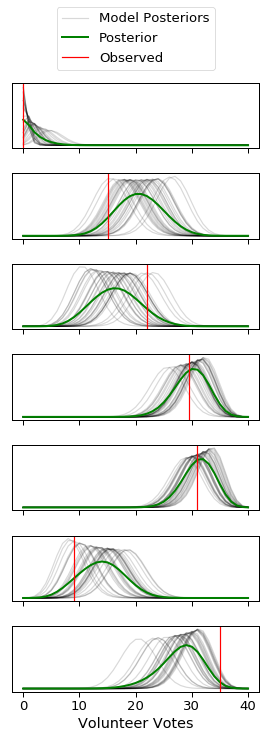

In [155]:
selected = slice(1, 8)
custom_samples(np.array(sim_model.model.samples[selected, :]), np.array(sim_model.labels[selected]))

/home/ubuntu/root/zoobot/zoobot/estimators/make_predictions.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/envs

ValueError: x and y must have same first dimension, but have shapes (41,) and (1,)

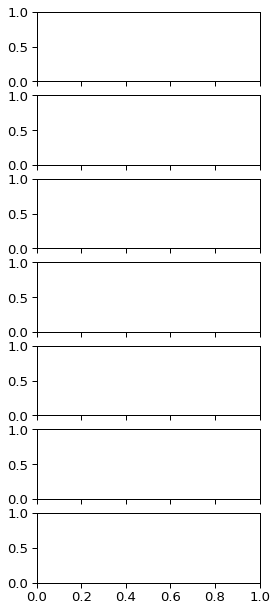

In [165]:
custom_samples(np.array(sim_model.model.samples[selected, :1]), np.array(sim_model.labels[selected]))

In [68]:
# acquisition_utils.save_acquisition_examples(model., model.mutual_info, 'mutual_info', save_dir)

In [ ]:



# add in catalog details for more metrics
catalog = pd.DataFrame('data/panoptes_predictions_selected.csv')
sim_model = simulated_metrics.SimulatedModel(model, catalog)

sim_model.show_coverage(save_dir)
sim_model.compare_binomial_and_abs_error(save_dir)
sim_model.show_acquisition_vs_label(save_dir)

